In [4]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# A/B Testing

Creemos una prueba básica de A'B testing.
- Escenario A: Página web con botón AZUL
- Escenario B: Página web con botón ROJO

Hipótesis: La tasa de conversión del Escenario A es mejor que la del escenario B

Métrica: Taza de conversión

In [ ]:
# Recolectamos data
test_df = pd.DataFrame(data = {"A": [10, 990],
                               "B": [8, 992]}, 
                        index= ['Click', 'No click'])

In [10]:
test_df

,A,B
Click,10,8
No click,990,992


In [ ]:
# Calculamos el conversion rate para cada caso.
test_df.loc['Conversion Rate'] = test_df.loc['Click'] / (test_df.loc['Click'] + test_df.loc['No click'])

In [15]:
test_df

,A,B
Click,10.00,8.000
No click,990.00,992.000
Conversion Rate,0.01,0.008


# Permutation

1. Tomar muestras de 2 o más grupos
2. Juntar todos los datos.
3. Tomar valores sin reemplazo y asignarlas a grupos del mismo tamaño de los grupos originales.
4. Repetir esto 'n' veces.

Para este ejemplo se va a tomar datos de 'tiempo de sesión' de dos versiones de una página web: 'Page A' y 'Page B'. 

In [5]:
df_web_pages = pd.read_csv("../data/web_page_data.csv")
df_web_pages

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67
5,Page B,0.85
6,Page A,2.11
7,Page B,2.46
8,Page A,1.32
9,Page B,1.49


<Axes: ylabel='Time'>

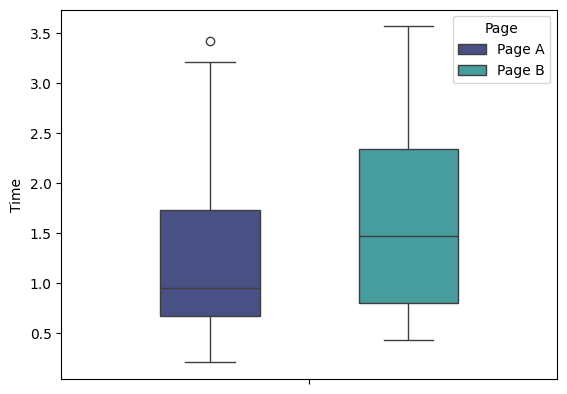

In [45]:
sns.boxplot(data=df_web_pages, y='Time', hue='Page', palette="mako", fill=True, width=0.8, gap=0.5)

In [123]:
# Calculating means for each group
A_mean = np.round(df_web_pages[df_web_pages['Page'] == 'Page A']['Time'].mean(), 2)
B_mean = df_web_pages[df_web_pages['Page'] == 'Page B']['Time'].mean()
real_mean_diff = np.round(B_mean - A_mean, 2)
print(f"""Mean Time (s)
    Page A: {A_mean}
    Page B: {B_mean}
    Mean diff (B-A): {real_mean_diff}""")

Mean Time (s)
    Page A: 1.26
    Page B: 1.62
    Mean diff (B-A): 0.36


In [ ]:
import random

In [ ]:
## Definimos una funcion para hacer una permutacion y calcular la diferencia de las medias en esa permutacion
def perm_func( data: pd.DataFrame, nA: int, nB: int  ):
    n = nA + nB
    
    idx_A = set(random.sample( range(n) , nA))
    idx_B = set(range(n)) - idx_A

    A_elements = data.loc[list(idx_A)]
    B_elements = data.loc[list(idx_B)]

    A_mean = data.loc[list(idx_A)].mean(numeric_only=True)
    B_mean = data.loc[list(idx_B)].mean(numeric_only=True)

    return A_mean - B_mean

In [ ]:
# Testing the function
nA = len(df_web_pages[df_web_pages['Page'] == 'Page A'])
nB = len(df_web_pages[df_web_pages['Page'] == 'Page B'])

mean_diff = perm_func(df_web_pages, nA, nB)
mean_diff

Time   -0.529238
dtype: float64

In [120]:
# Repeating 1000 times and recording values
permutation_results = []
for i in range(1000):
    value = perm_func(df_web_pages, nA, nB)
    value = np.round(value.iloc[0], 2)
    permutation_results.append(value)

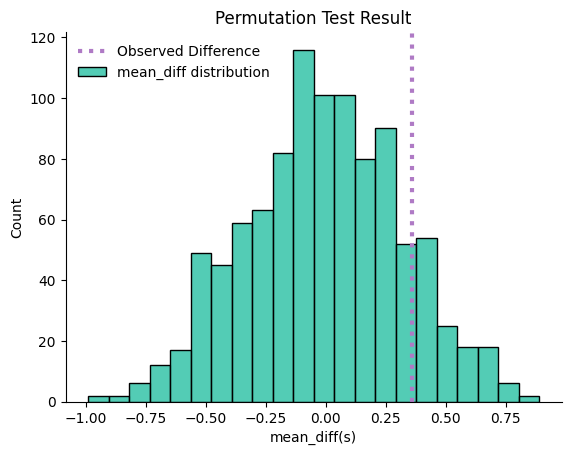

In [163]:
fig, ax = plt.subplots()
sns.histplot(permutation_results, label='mean_diff distribution', color='#1abc9c', ax=ax)
ax.spines["top"].set_visible(False)   # Remove top border
ax.spines["right"].set_visible(False)   # Remove right border
ax.axvline(real_mean_diff, label= 'Observed Difference', color = "#af7ac5", linewidth=3, linestyle='dotted')
plt.legend()
plt.title('Permutation Test Result')
plt.xlabel('mean_diff(s)')
plt.legend(frameon=False)
plt.show()

In [173]:
# Porcentaje de datos que son mayores que lo observado (P-value)
np.mean(np.array(permutation_results) > real_mean_diff)

np.float64(0.127)

Este valor es el p-value: 0.127, lo que indica un valor de significancia bajo ( los valores de significancia considerables se encuentran entre 0.1 y 0.05), por lo cual, se acepta la hipótesis nula.